**Tutorial 4 - Numerical Methods SPA623M** $\\$
(21st Oct 2024)$\\$
Topics included
1. Legendre Polynomial
2. Simpson Rule 
3. Gaussian Quadrature

In [6]:
'''Import the libraries'''

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss


**Question 1: Legendre Polynomial:** $\\$

(a) Write a function that calculates a Legendre polynomial $\\$ of degree using the Bonnet’s recursion formula,$\\$

$$ P_n(x) = \frac{2n-1}{n} x P_{n-1} (x) - \frac{n-1}{n} P_{n-2}(x), \ P_0(x)=1,\ P_1(x)=x.\\ $$

Hint: Use `scipy.special.legendre`.$\\$

(b) Plot $P_n(x)$ for n=0,1,2,3,5,10, in the range [-5,5].


In [7]:
# Answer 1
import sympy as sp

x = sp.Symbol("x")

print(x)

def P_legendre(n,x):
    if n == 0:
        return 1
    if n == 1:
        return x
    return (2*n-1)*x/n*P_legendre(n-1,x) - (n-1)/n*P_legendre(n-2,x)
    

x


In [8]:
n = 2

print(P_legendre(n,x))

#print(" Legendry polynomial according to me : ",P_legendre(n,x).simplify())

#print(" Legendry polynomial according to scipy : ",ss.legendre(n))



3*x**2/2 - 0.5


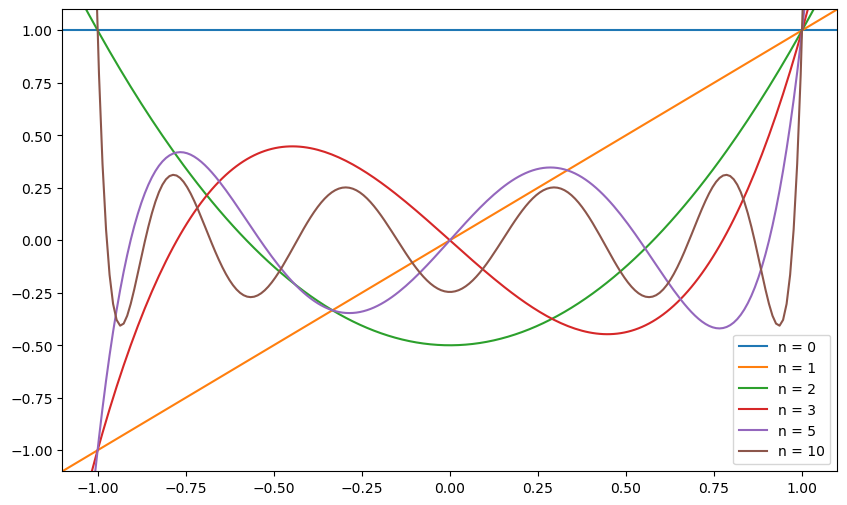

In [11]:
xline = np.linspace(-5,5,1000)

plt.figure(figsize=(10,6))

for n in [0,1,2,3,5,10]:
    if n == 1:
        ans = lambda x: x*n
    elif n == 0:
        ans = lambda x: x*0+1
    else:
        ans = sp.lambdify(x, P_legendre(n,x),'numpy')
    plt.plot(xline,ans(xline),label=f"n = {n}")
plt.legend()
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)
plt.show()


**Question 2: Simpson rule** $\\$
Use simpson 1/3 rule, n intevals $\\$
$$\int_{a}^{b} f(x) dx \approx \frac{(b-a)}{3} \bigg(f(a) + 4(\sum_{i=1, i \ odd}^{n-1} f(x_i)) + 2(\sum_{i=2,i \ even}^{n-2} f(x_i)) + f(b)\bigg)$$

Compute the following.


(1) Assume $f(x) = sin(x)$ on the interval [$0,\pi$], compute the it's integral for n=2,3,4,5....21.


(2) Plot the error with n.

(3) Show that for a large n, simpson 1/3 rule is more accurate than trapezoid rule. Use scipy routines.

`from scipy.integrate import trapz,simps`


(4) Repeat it with $f(x) = 3x^2$ on interval [0,1].

In [12]:
# Answer 2
#x = sp.Symbol("x")

def f(x):
    return np.sin(x)

def simpson(f,initial):
    [a,b,n] = initial
    
    S1 = f(a)
    
    S2 = 0
    h = (b-a)/n
    for i in range(1,n,2):
        x = a + i*h
        #print(f"S2 n = {i} x = {x}")
        S2 = S2 + f(x)
    S2 = 4 * S2

    S3 = 0
    for i in range(2,n-1,2):
        x = a + i*h
        #print(f"S3 n = {i} x = {x}")
        S3 = S3 + f(x)
    S3 = 2*S3

    S4 = f(b)
    
    #print(S1)
    #print(S4)

    return h/3*(S1 + S2 + S3 + S4)



In [13]:
x = 1
a = 0
b = np.pi
n = 100

initial = [a,b,n]

print("Simpson",simpson(f,initial))


Simpson 2.000000010824504


In [15]:
from scipy.integrate import simpson,quad

In [18]:


x = np.linspace(a,b,n+1)
y = f(x)
    
ans = simpson(y, x=x)

print(ans)


2.0000000108245044


In [22]:
True_intigral = quad(f,a,b)[0]
print(True_intigral)

x = 1
a = 0
b = np.pi
n = 100



initial = [a,b,n]


N = range(4,22)

plt.figure(figsize=(10,6))
err_simp = []
for i in N:
    True_intigral = quad(f,a,b)[0]
    
    x_line = np.linspace(a,b,n+1)
    y_line = f(x)
    print(simpson(y_line, x_line))
    err_simp.append(True_intigral - simpson(y_line, x=x_line))
    err_trap.append(True_intigral- trapz(y_line, x_line))


plt.plot(N,err_trap,"-r" ,label= "Error in trapezoidal")
plt.plot(N,err_trap,"*b" )

plt.plot(N,err_simp, "-k" ,label= "Error in simpson")
plt.plot(N,err_simp,"*g" )


#plt.ylim(-1,1)
#plt.xlim(-1,1)
plt.legend()
plt.title("Error vs itterations")
plt.xlabel("Itterations")
plt.ylabel("Error")
plt.show()


2.0


TypeError: simpson() takes 1 positional argument but 2 were given

<Figure size 1000x600 with 0 Axes>

In [20]:
x = 1
a = 0
b = np.pi
n = 100

x_line = np.linspace(a,b,n)
y_line = f(x)
print(simps(y_line, x=x_line))

NameError: name 'simps' is not defined

In [ ]:
from scipy.integrate import trapz,simps

x = 1
a = 0
b = np.pi
n = 100

initial = [a,b,n]

print("Simpson",simpson(f,initial))

N = range(2,22)

plt.figure(figsize=(10,6))
err_trap = []
for i in N:
    initial = [a,b,i]
    err.append(True_intigral-simpson(f,initial))
    plt.scatter(i,True_intigral-simpson(f,initial))
plt.plot(N,err)
#plt.ylim(-1,1)
#plt.xlim(-1,1)
plt.title("Error vs itterations")
plt.xlabel("Itterations")
plt.ylabel("Error")
plt.show()



**Question 3: Gaussian Quadrature**

Consider quadrature formula with weight $w_i$ and nodes $x_i$, i.e.,$\\$
$\int_a^b f(x) dx \approx \sum_{i=0}^{n} w_i f(x_i)$.$\\$
(a) Compute the integration of $f(x) = 3x^2$ in the interval $[-1, 1]$ for nodes, n = 1 to 5.$\\$
Hint: Use `numpy.polynomial.legendre.leggauss` to computing weights and nodes. $\\$
(b) Repeat for $f(x)=sin(x)$ with interval [0,$\pi$] for n=1 to 5.


In [ ]:
# Answer 3